Here I generate parallax values for 20 stars. The mean parallax is 1.0 mas. The group has an intrinsic dispersion value of 0.2 mas, and each star has a measurement error ranging from 0.02 to 0.4.

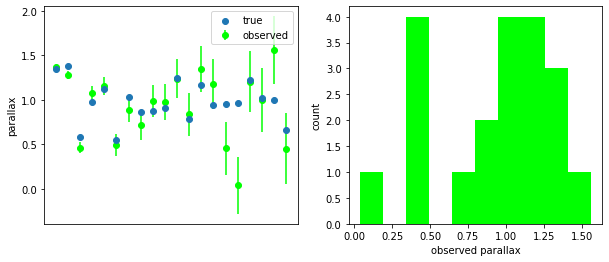

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2000)

N = 20
mean_parallax = 1.0
sigma_parallax = 0.2
true_parallaxes = np.random.normal(loc=mean_parallax, scale=sigma_parallax, size=N)

# add random errors:
uncertainties = 0.02*np.arange(N)+0.02
observed_parallaxes = np.random.normal(loc=true_parallaxes, scale=uncertainties)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter( np.arange(N) , true_parallaxes , zorder=2 , label='true')
plt.errorbar( np.arange(N) , observed_parallaxes , 
             yerr=uncertainties, fmt='o', color='lime', zorder=1, label='observed' )
plt.xticks([])
plt.legend()
plt.ylabel('parallax')

plt.subplot(122)
plt.hist( observed_parallaxes , facecolor='lime')
plt.xlabel('observed parallax')
plt.ylabel('count');

We can get a reasonable estimate of the **mean true parallax** by simply averaging all the observed parallaxes. Since we know the uncertainty associated with each star, we can give a higher weight to the stars with smaller uncertainties. But can we also estimate the **dispersion of the true parallax**?

We can do that through a Maximul Likelihood Estimation. We need to choose a model: here we think that the true parallax $p_i$ of each star is picked from a Gaussian distribution with mean $\mu$ and dispersion $\sigma$, then the observed parallax $o_i$ of each star is the combination of $p_i$ and some Gaussian error $e_i$.

For a given choice of $\mu$ and $\sigma$, the log-likelihood for each star is:

In [2]:
from scipy import stats

In [3]:
MU = 1.5
SIGMA = 0.5

all_log_likelihoods = stats.norm.logpdf(observed_parallaxes, 
                                        loc=MU*np.ones(N), 
                                        scale=SIGMA*np.ones(N)+uncertainties )


print( all_log_likelihoods )
print('Sum:', sum(all_log_likelihoods))

[-0.29698804 -0.38660035 -2.05034721 -0.64301511 -0.56956498 -1.76291096
 -0.93195601 -1.21571715 -0.81607583 -0.84296594 -0.65672814 -1.01792959
 -0.66583343 -0.75701258 -1.54711318 -2.3105365  -0.80682672 -0.93701378
 -0.79341035 -1.49411935]
Sum: -20.502665178170044


Trying many different values:

CPU times: user 218 ms, sys: 7.88 ms, total: 226 ms
Wall time: 220 ms


Text(0, 0.5, 'SIGMA')

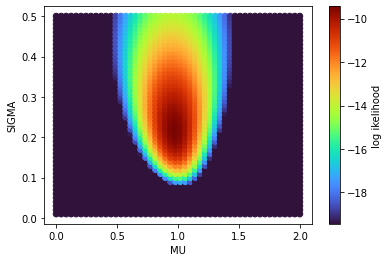

In [4]:
%%time

all_mu = []
all_sigma = []
total_log_likelihood = []

for MU in np.linspace(0,2,50):
    for SIGMA in np.linspace(0.01,0.5,50):
        all_log_likelihoods = stats.norm.logpdf(observed_parallaxes, 
                                                loc=MU*np.ones(N), 
                                                scale=SIGMA*np.ones(N)+uncertainties )
        all_mu.append( MU )
        all_sigma.append( SIGMA )
        total_log_likelihood.append( sum(all_log_likelihoods) )

plt.scatter( all_mu , all_sigma , c=total_log_likelihood , 
            vmin=max(total_log_likelihood)-10, cmap='turbo')
plt.colorbar(label='log ikelihood')
plt.xlabel('MU')
plt.ylabel('SIGMA')

The likelihood peaks around MU=1, SIGMA=0.2, which is what we imposed at the beginning.

This is a brute force approach. You can use scipy's `minimize` module to find the minimum of `-1*loglikelihood`.

For uncertainties on the results, you can find the contour that encloses 68% or 95% of the total likelihood.

# With no intrinsic spread:

CPU times: user 237 ms, sys: 5.62 ms, total: 243 ms
Wall time: 243 ms


Text(0, 0.5, 'SIGMA')

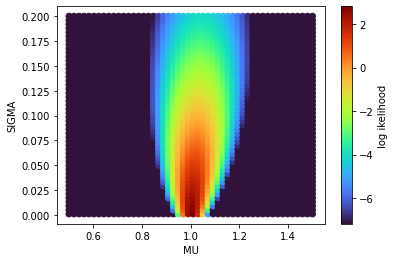

In [5]:
%%time
N = 20
mean_parallax = 1.0
sigma_parallax = 0.00001
true_parallaxes = np.random.normal(loc=mean_parallax, scale=sigma_parallax, size=N)

# add random errors:
uncertainties = 0.02*np.arange(N)+0.02
observed_parallaxes = np.random.normal(loc=true_parallaxes, scale=uncertainties)

all_mu = []
all_sigma = []
total_log_likelihood = []

for MU in np.linspace(0.5,1.5,50):
    for SIGMA in np.linspace(0.001,0.2,50):
        all_log_likelihoods = stats.norm.logpdf(observed_parallaxes, 
                                                loc=MU*np.ones(N), 
                                                scale=SIGMA*np.ones(N)+uncertainties )
        all_mu.append( MU )
        all_sigma.append( SIGMA )
        total_log_likelihood.append( sum(all_log_likelihoods) )

plt.scatter( all_mu , all_sigma , c=total_log_likelihood , 
            vmin=max(total_log_likelihood)-10, cmap='turbo')
plt.colorbar(label='log ikelihood')
plt.xlabel('MU')
plt.ylabel('SIGMA')